In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools

# Exercise 1

In the following example, we're going to show how, after one iteration, the K-means algorithm can update its centroids such that a centroid ends up empty, even if it previously had data. For this, we use a 1D array of points.

In [3]:
data = [2,3,7,8]

print("Let's say that, after random initiation, the centroids are:")
centroids = [0,5,10]
print(centroids)

print("We now calculate the clusters assigning each point to its closest cluster")
cluster_id = []
for i in range(len(data)):
    xj = data[i]
    distances = []
    for i in range(len(centroids)):
        dist = abs(xj - centroids[i])
        distances.append(dist)
    i_star = np.argmin(distances)
    cluster_id.append(i_star)
print(f"The first cluster id array is: {cluster_id}")

print("We then reassign our centroids")
new_centroids = []
for id in set(cluster_id):
    mean = 0
    cluster_len = 0
    for i, cluster in enumerate(cluster_id):
        if(cluster == id):
            mean += data[i]
            cluster_len += 1
        
    mean = mean/cluster_len
    new_centroids.append(mean)
print(f"The new centroids are: {new_centroids}")

print("Let's find our clusters again")
new_cluster_id = []
for i in range(len(data)):
    xj = data[i]
    distances = []
    for i in range(len(new_centroids)):
        dist = abs(xj - new_centroids[i])
        distances.append(dist)
    i_star = np.argmin(distances)
    new_cluster_id.append(i_star)
print(f"The second cluster id array is: {new_cluster_id}")

print('As we can see, the cluster with ID 1 has ended up empty, even when it had points in the previous iteration')


Let's say that, after random initiation, the centroids are:
[0, 5, 10]
We now calculate the clusters assigning each point to its closest cluster
The first cluster id array is: [0, 1, 1, 2]
We then reassign our centroids
The new centroids are: [2.0, 5.0, 8.0]
Let's find our clusters again
The second cluster id array is: [0, 0, 2, 2]
As we can see, the cluster with ID 1 has ended up empty, even when it had points in the previous iteration


# Exercise 2

In [4]:
def kMeans(A, k, eps, mu = None):
    import numpy as np

    n, d = A.shape 
    t = 0
    
    mu_t = A[np.random.choice(n, k, replace=False)] 
    
    while True:
        t += 1
        C = [[] for _ in range(k)] 
        cluster_assignments = [-1] * n
        
        for j in range(n):
            xj = A[j]
            i_star = np.argmin(np.linalg.norm(xj - mu_t, axis=1)) 
            C[i_star].append(xj)
            cluster_assignments[j] = i_star
        
        mu_t_minus_1 = np.copy(mu_t)
        for i in range(k):
            if len(C[i]) > 0:
                mu_t[i] = np.mean(C[i], axis=0)
            else:
                mu_t[i] = A[np.random.choice(n)]
        
        if np.linalg.norm(mu_t - mu_t_minus_1) <= eps:
            break

    sse = 0.0
    for i in range(len(mu_t)):
        cluster_points = A[cluster_assignments[i]]
        centroid = mu_t[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2)
        cluster_sse = np.sum(squared_distances)
        sse += cluster_sse
    
    return mu_t, cluster_assignments, sse

In [5]:
def DBSCAN(D, epsilon, minpts):

    def range_query(p):
        neighbours = []
        for q in range(len(D)):
            euclidean_distance = 0
            for a, b in zip(D[q], D[p]):
                euclidean_distance += (a - b) ** 2
            euclidean_distance = euclidean_distance ** 0.5
            if euclidean_distance <= epsilon:
                neighbours.append(q)
        return neighbours

    def DENSITYCONNECTED(x, k):
        cluster_assignments[x] = k
        for y in range_query(x):
            if cluster_assignments[y] == -1:
                cluster_assignments[y] = k
                if y in core_points:
                    DENSITYCONNECTED(y, k)

    n = len(D)
    cluster_assignments = [-1] * n  
    core_points = set()

    for xi in range(n):
        neighbours = range_query(xi)
        if len(neighbours) >= minpts:
            core_points.add(xi)

    k = 0
    for xi in range(n):
        if cluster_assignments[xi] == -1:
            if xi in core_points:
                k += 1
                cluster_assignments[xi] = k          
                DENSITYCONNECTED(xi, k)

    clusters = {}
    for i in range(1, k + 1):
        clusters[i] = [D[x] for x in range(n) if cluster_assignments[x] == i]

    noise = [D[x] for x in range(n) if cluster_assignments[x] == -1]

    return cluster_assignments


# Exercise 3

In [6]:
def plotClusters(A, C, dimX, dimY, title, dimZ = None, ax = None):
    if ax == None:
        fig, ax = plt.subplots()

    num_categories = len(list(set(C)))
    if -1 not in C:
        colormap = sns.color_palette(None,num_categories + 1)
        markers = ['o'] * (num_categories + 1) 
    else:
        C = [x+1 for x in C]
        colormap = [(0, 0, 0)]
        markers = ['x']
        temp = (sns.color_palette(None,num_categories))
        for color in temp:
            colormap.append(color)
            markers.append('o')

    if dimZ is None:
        for i, point in enumerate(A):
            ax.scatter(point[dimX],point[dimY],c=colormap[C[i]],marker=markers[C[i]])
            ax.set_title(title)
            ax.set_xlabel(f'Dimension: {dimX}', fontweight ='bold')
            ax.set_ylabel(f'Dimension: {dimY}', fontweight ='bold')
    else:
        ax.axis('off')
        ax = plt.axes(projection ="3d")
        for i, point in enumerate(A):
            ax.scatter(point[dimX],point[dimY],point[dimZ],c=colormap[C[i]],marker=markers[C[i]])
            ax.set_title(title)
            ax.set_xlabel(f'Dimension: {dimX}', fontweight ='bold')
            ax.set_ylabel(f'Dimension: {dimY}', fontweight ='bold')
            ax.set_zlabel(f'Dimension: {dimZ}', fontweight ='bold')

    return ax

In [7]:
df_iris = pd.read_csv("iris_pca.csv")
pca_iris = df_iris.to_numpy()

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_24516\3432041775.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(point[dimX],point[dimY],c=colormap[C[i]],marker=markers[C[i]])


The best k-means clustering was found in iteration 8, which has an sse value of 16.957631102808406


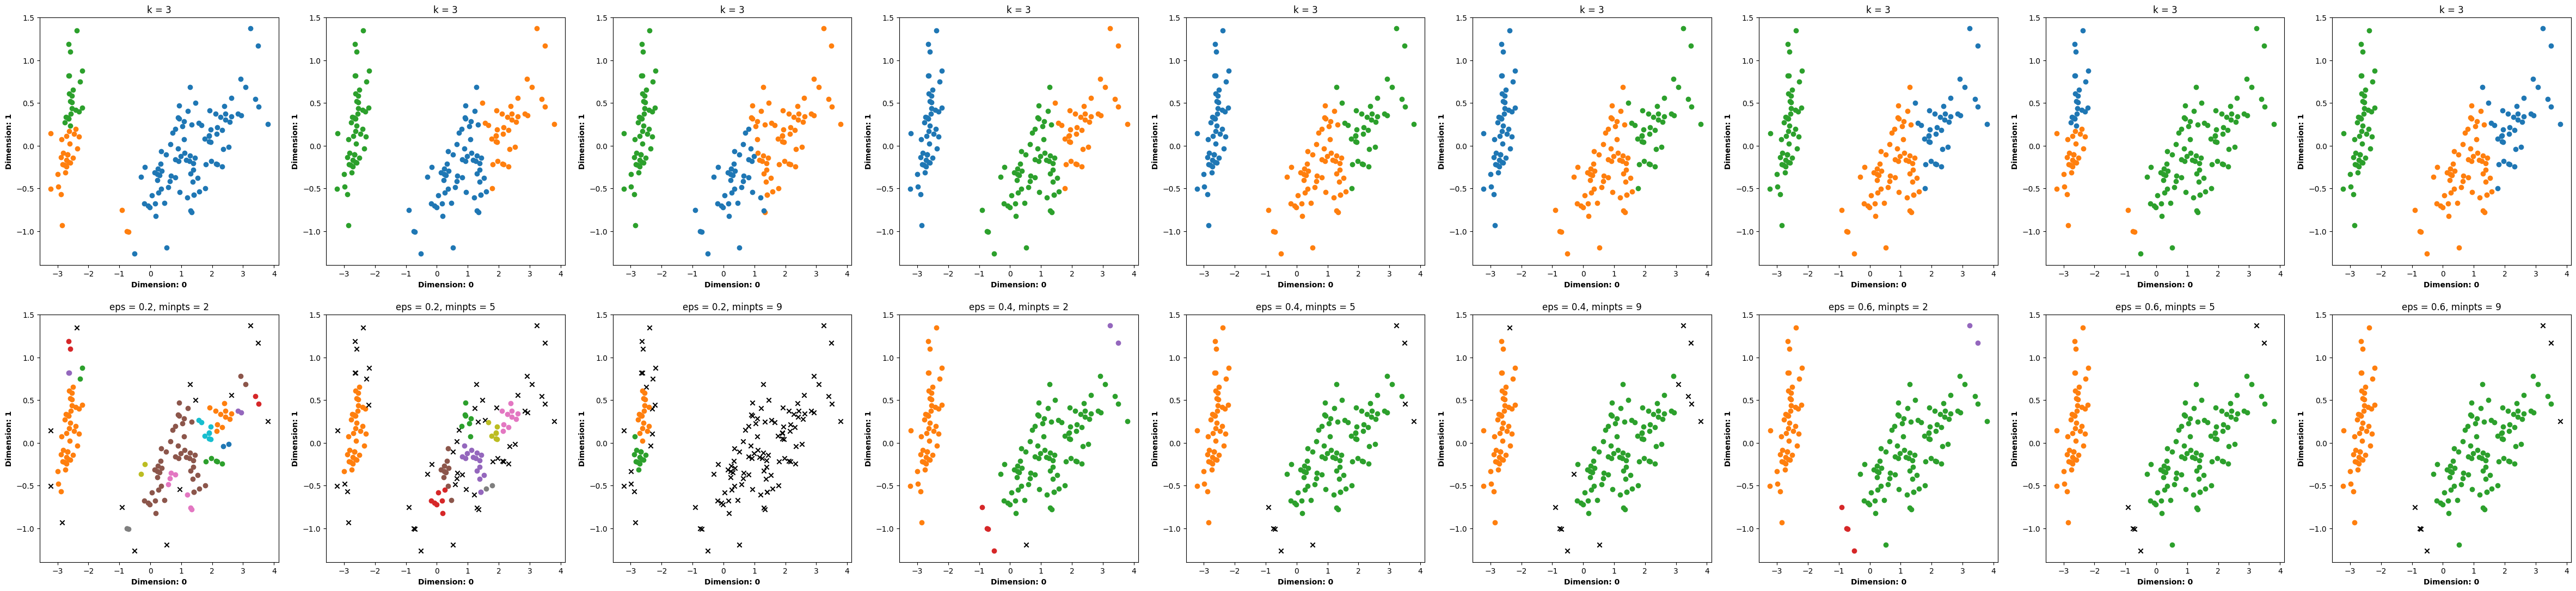

In [11]:
fig, axs = plt.subplots(2,9)

sse_list = []
for i in range(9):
    mu, C, sse = kMeans(pca_iris,3,0.1)
    sse_list.append(sse)
    plotClusters(A=pca_iris,C=C,dimX=0,dimY=1,dimZ=None,ax=axs[0,i],title=f"k = 3")

best_sse = min(sse_list)
index_best = sse_list.index(best_sse)
print(f"The best k-means clustering was found in iteration {index_best+1}, which has an sse value of {best_sse}")

eps = [0.2,0.4,0.6]
min_pts = [2,5,9]

i=0
for epsilon, min_pt in itertools.product(eps,min_pts):
    C = DBSCAN(D=pca_iris,epsilon=epsilon,minpts=min_pt)
    plotClusters(A=pca_iris,C=C,dimX=0,dimY=1,dimZ=None,ax=axs[1,i],title=f"eps = {epsilon}, minpts = {min_pt}")
    i += 1

plt.rcParams["figure.figsize"] = (60,12)   
plt.show()